# Práctica 12: Árboles y Bosques Aleatorios para la predicción del precio de acciones.

En la siguiente práctica se ejemplificará el uso de los árboles de decisión y los bosques aleatorios para la predicción del precio de una acción. Adicionalmente, se graficará la predicción y se compararán.

* Un árbol de decisión es un algoritmo de aprendizaje supervisado enfocado tanto a la regresión como a la clasificación, el cual emplea una estructura jerárquica en forma de árbol que divide los datos en función de una condición delimitada por la variable más importante del conjunto de entrenamiento.

* Los bosques aleatorios son una mejora de los árboles de decisión y, básicamente, se trata de una generalización del mismo por medio de múltiples árboles combinados, donde cada árbol se entrena con distintas muestras de entrenamiento para obtener un pronóstico o clasificación más acertada por medio de un concenso entre los distintos árboles de decisión.


*Preparación de los datos*

In [143]:
# Instalación de Yahoo Finance y TradingView-TA(En caso de no estar instalado).
!pip install yfinance
!pip install tradingview-ta

In [144]:
# Declaración de bibliotecas
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline
# Para generar y almacenar los gráficos dentro del cuaderno

import yfinance as yf
import mplfinance as mpl

In [145]:
# Definimos el Ticker para el Banco Bilbao Vizcaya Argentaria, S.A.
dataBBVA = yf.Ticker('BBVA')

# Recuperamos la serie de tiempo para las acciones de BBVA.
BBVAHist = dataBBVA.history(start = '2010-1-1', end = '2023-05-13', interval = '1d')
BBVAHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,8.868826,8.988999,8.864019,8.950544,584441,0.0,0.0
2010-01-05 00:00:00-05:00,9.027456,9.070719,8.940932,9.017842,518237,0.0,0.0
2010-01-06 00:00:00-05:00,8.984193,9.104366,8.960157,9.061104,371390,0.0,0.0
2010-01-07 00:00:00-05:00,8.979387,9.022650,8.916897,8.998615,472780,0.0,0.0
2010-01-08 00:00:00-05:00,9.022652,9.133212,9.022652,9.113984,484983,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-08 00:00:00-04:00,7.040000,7.050000,7.000000,7.020000,1326300,0.0,0.0
2023-05-09 00:00:00-04:00,6.890000,6.950000,6.860000,6.930000,988300,0.0,0.0
2023-05-10 00:00:00-04:00,7.000000,7.000000,6.860000,6.920000,806100,0.0,0.0


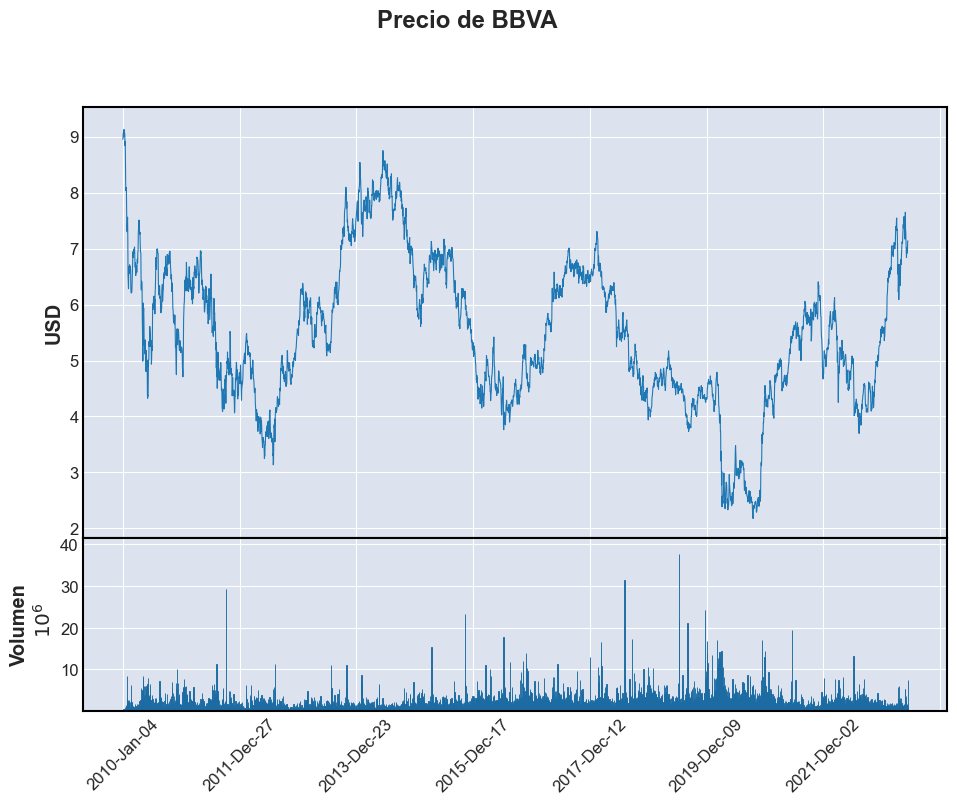

In [146]:
mpl.plot(BBVAHist, type='line', volume = True, title = 'Precio de {}'.format("BBVA"), figscale = 1.5, ylabel = 'USD', ylabel_lower = 'Volumen')

Para el análisis a realizar se incluirá el volumen, eliminándose dividendos y stocks splits.

In [147]:
dataset = BBVAHist.drop(columns = ['Dividends', 'Stock Splits'])
dataset

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00-05:00,8.868826,8.988999,8.864019,8.950544,584441
2010-01-05 00:00:00-05:00,9.027456,9.070719,8.940932,9.017842,518237
2010-01-06 00:00:00-05:00,8.984193,9.104366,8.960157,9.061104,371390
2010-01-07 00:00:00-05:00,8.979387,9.022650,8.916897,8.998615,472780
2010-01-08 00:00:00-05:00,9.022652,9.133212,9.022652,9.113984,484983
...,...,...,...,...,...
2023-05-08 00:00:00-04:00,7.040000,7.050000,7.000000,7.020000,1326300
2023-05-09 00:00:00-04:00,6.890000,6.950000,6.860000,6.930000,988300
2023-05-10 00:00:00-04:00,7.000000,7.000000,6.860000,6.920000,806100


*Árboles de decisión* 

A continuación aplicamos el algoritmo sobre el dataset.

In [148]:
# Bibliotecas para emplear un árbol de decisión regresivo.
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [149]:
# Selección de variables predictoras: Open, High, Low y Volume.
X = np.array(dataset 
    [['Open', 
    'High', 
    'Low', 
    'Volume']])

pd.DataFrame(X)

,0,1,2,3
0,8.868826,8.988999,8.864019,584441.0
1,9.027456,9.070719,8.940932,518237.0
2,8.984193,9.104366,8.960157,371390.0
3,8.979387,9.022650,8.916897,472780.0
4,9.022652,9.133212,9.022652,484983.0
...,...,...,...,...
3358,7.040000,7.050000,7.000000,1326300.0
3359,6.890000,6.950000,6.860000,988300.0
3360,7.000000,7.000000,6.860000,806100.0
3361,7.040000,7.150000,7.010000,1298300.0


In [150]:
# Variable de regresión (el pronóstico que se busca): Close.
Y = np.array(dataset[['Close']])
pd.DataFrame(Y)

,0
0,8.950544
1,9.017842
2,9.061104
3,8.998615
4,9.113984
...,...
3358,7.020000
3359,6.930000
3360,6.920000
3361,7.120000


A continuación se realiza la división de los datos, eligiendo un muestreo aleatorio y definiendo una regla 80/20 para los conjunto de entrenamiento y validación.

In [151]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

pd.DataFrame(X_test)

,0,1,2,3
0,4.510226,4.536449,4.440300,3336200.0
1,5.672033,5.686881,5.620064,3003400.0
2,5.080443,5.080443,4.943133,861600.0
3,4.615418,4.622641,4.528743,1590400.0
4,4.326503,4.340949,4.297611,1986400.0
...,...,...,...,...
668,8.068628,8.120768,7.996936,1550800.0
669,6.040734,6.050588,5.789447,2272983.0
670,5.401783,5.419264,5.349338,2092200.0
671,4.899771,4.988374,4.837748,4641400.0


Luego, se procede a entrenar el modelo. En este caso, se opta por definir una profundidad máxima, el mínimo de muestras antes de dividir un nodo y el mínimo de muestras por hoja.

In [152]:
PronosticoAD = DecisionTreeRegressor(max_depth=5, min_samples_split=15, min_samples_leaf=10, random_state=0)
PronosticoAD.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=15,
                      random_state=0)

Por último, generamos pronósticos con el set de entrenamiento de las variables predictoras y validamos resultados.

In [153]:
Y_Pronostico = PronosticoAD.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,4.456548
1,5.600853
2,5.020144
3,4.647591
4,4.241315
...,...
668,8.013015
669,5.891758
670,5.431985
671,5.020144


In [154]:
Valores = pd.DataFrame(Y_test, Y_Pronostico)
Valores

,0
4.456548,4.457782
5.600853,5.627488
5.020144,4.949103
4.647591,4.550412
4.241315,4.304834
...,...
8.013015,8.009971
5.891758,5.833792
5.431985,5.393042
5.020144,4.882050


In [155]:
# Score R2: 99.02%
r2_score(Y_test, Y_Pronostico)

0.9964873215394918

In [156]:
print('Criterio: \n', PronosticoAD.criterion)
print('Importancia variables: \n', PronosticoAD.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_Pronostico))

Criterio: 
 squared_error
Importancia variables: 
 [0.         0.94293642 0.05706358 0.        ]
MAE: 0.0621
MSE: 0.0060
RMSE: 0.0773
Score: 0.9965


Ahora, verificamos el modelo de pronóstico con los valores reales de la serie de tiempo.

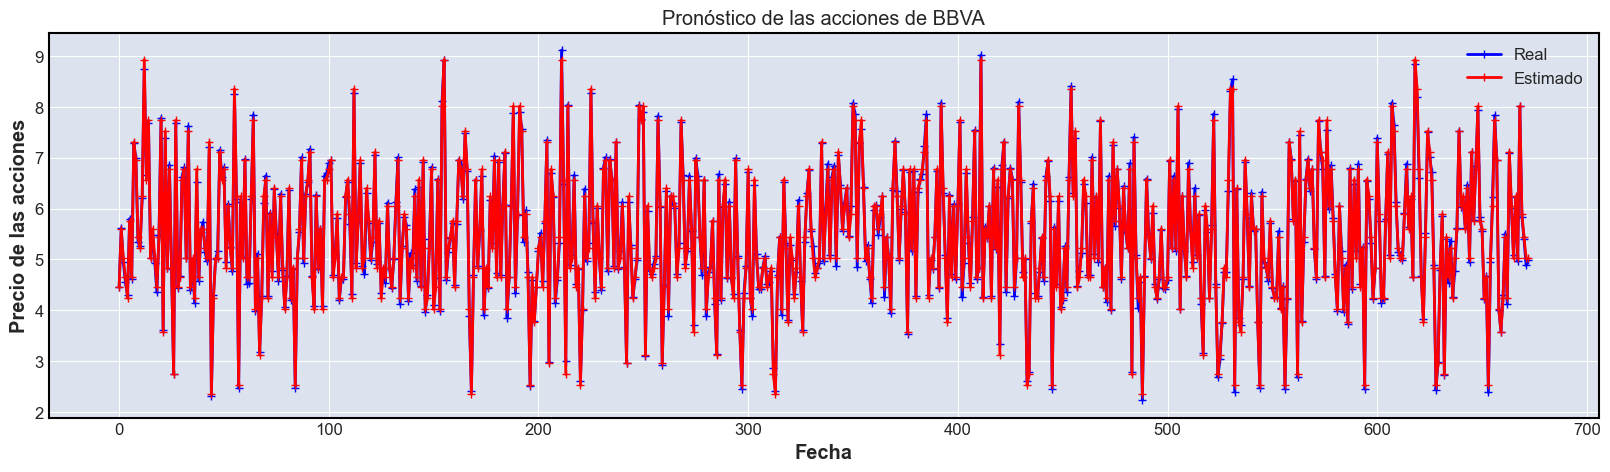

In [157]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='blue', marker='+', label='Real')
plt.plot(Y_Pronostico, color='red', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de BBVA')
plt.grid(True)
plt.legend()
plt.show()

In [158]:
# Importancia de las variables en el modelo.

Importancia = pd.DataFrame({'Variable': list(dataset[['Open', 'High', 'Low', 'Volume']]),
                            'Importancia': PronosticoAD.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
1,High,0.942936
2,Low,0.057064
0,Open,0.000000
3,Volume,0.000000


Verificamos la estructura del árbol:

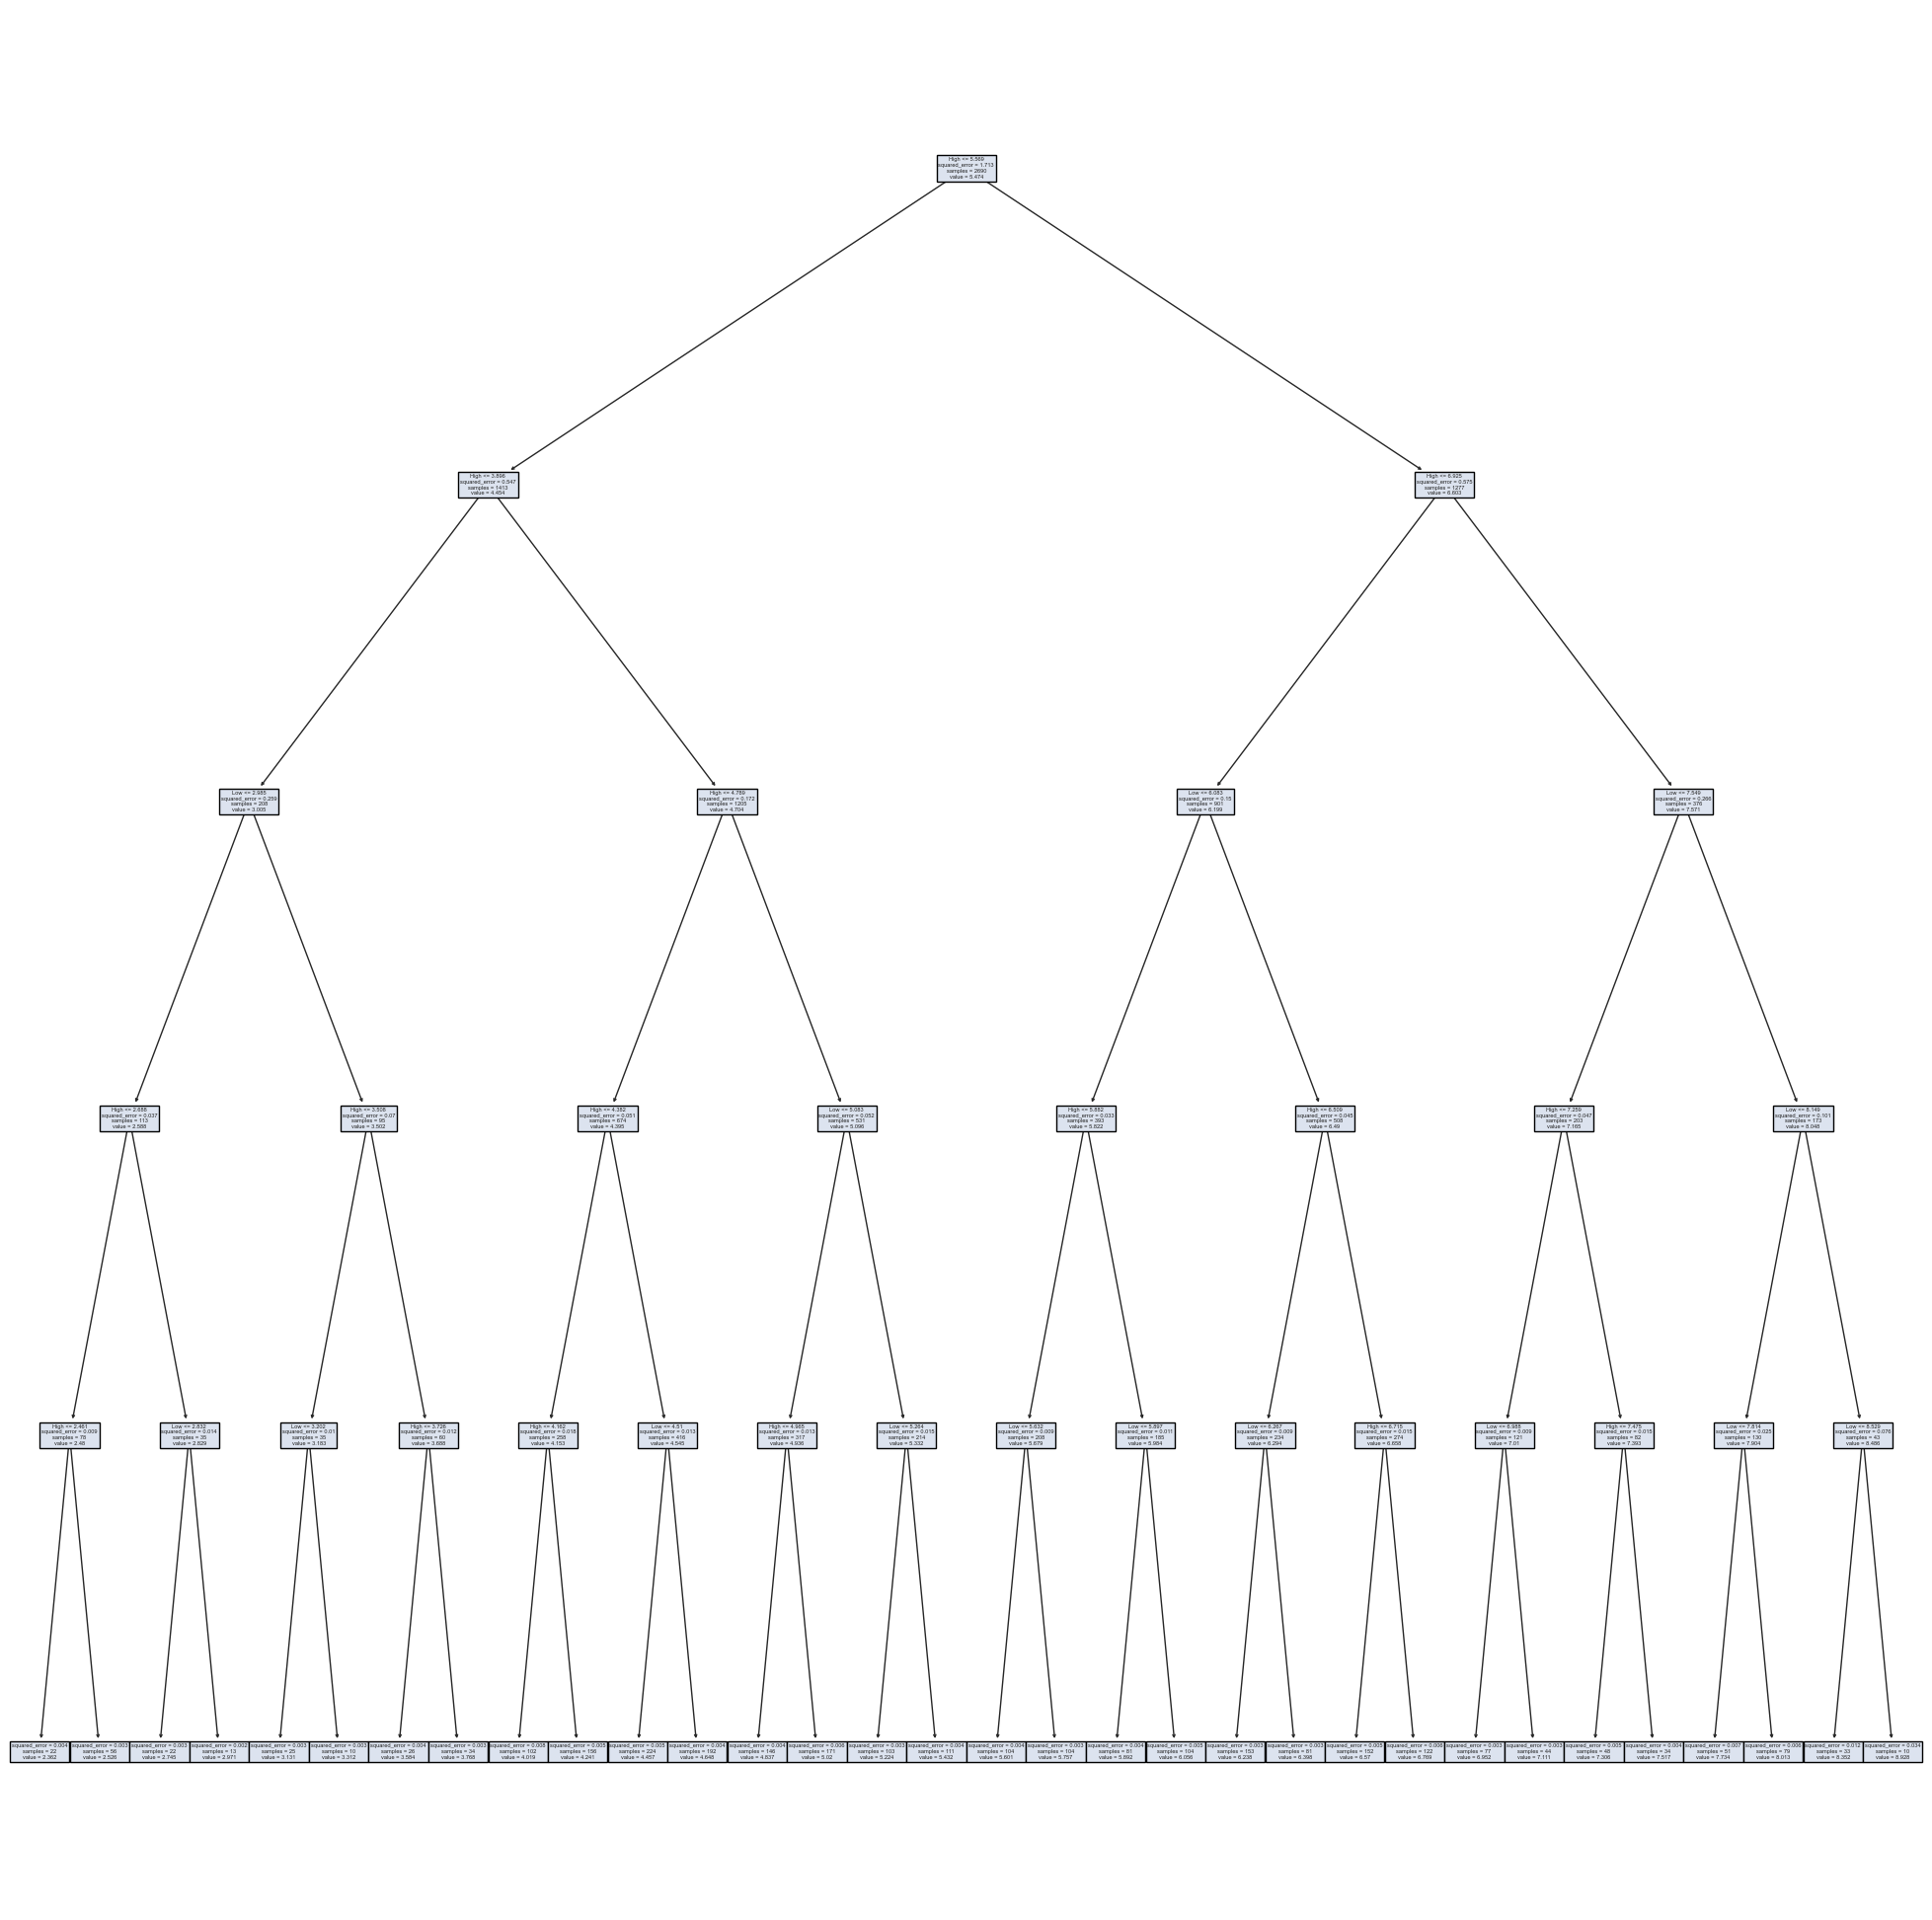

In [159]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,25))  
plot_tree(PronosticoAD, feature_names = ['Open', 'High', 'Low', 'Volume'])
plt.show()

In [160]:
from sklearn.tree import export_text
Reporte = export_text(PronosticoAD, feature_names = ['Open', 'High', 'Low', 'Volume'])
print(Reporte)

|--- High <= 5.57
|   |--- High <= 3.90
|   |   |--- Low <= 2.98
|   |   |   |--- High <= 2.69
|   |   |   |   |--- High <= 2.46
|   |   |   |   |   |--- value: [2.36]
|   |   |   |   |--- High >  2.46
|   |   |   |   |   |--- value: [2.53]
|   |   |   |--- High >  2.69
|   |   |   |   |--- Low <= 2.83
|   |   |   |   |   |--- value: [2.74]
|   |   |   |   |--- Low >  2.83
|   |   |   |   |   |--- value: [2.97]
|   |   |--- Low >  2.98
|   |   |   |--- High <= 3.51
|   |   |   |   |--- Low <= 3.20
|   |   |   |   |   |--- value: [3.13]
|   |   |   |   |--- Low >  3.20
|   |   |   |   |   |--- value: [3.31]
|   |   |   |--- High >  3.51
|   |   |   |   |--- High <= 3.73
|   |   |   |   |   |--- value: [3.58]
|   |   |   |   |--- High >  3.73
|   |   |   |   |   |--- value: [3.77]
|   |--- High >  3.90
|   |   |--- High <= 4.79
|   |   |   |--- High <= 4.38
|   |   |   |   |--- High <= 4.16
|   |   |   |   |   |--- value: [4.02]
|   |   |   |   |--- High >  4.16
|   |   |   |   |   |--- 

¿Y si utilizamos un árbol sin parámetros de entrada y, en su lugar, lo podamos?

In [161]:
PronosticoADP = DecisionTreeRegressor(random_state=0)
PronosticoADP.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [162]:
Y_PronosticoP = PronosticoADP.predict(X_test)
pd.DataFrame(Y_PronosticoP)

,0
0,4.468812
1,5.639704
2,5.062760
3,4.571412
4,4.323353
...,...
668,8.037223
669,6.040731
670,5.352796
671,4.950891


In [163]:
ValoresP = pd.DataFrame(Y_test, Y_PronosticoP)
ValoresP

,0
4.468812,4.457782
5.639704,5.627488
5.062760,4.949103
4.571412,4.550412
4.323353,4.304834
...,...
8.037223,8.009971
6.040731,5.833792
5.352796,5.393042
4.950891,4.882050


In [164]:
print('Criterio: \n', PronosticoADP.criterion)
print('Importancia variables: \n', PronosticoADP.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_PronosticoP))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_PronosticoP))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_PronosticoP, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_PronosticoP))

Criterio: 
 squared_error
Importancia variables: 
 [1.97883470e-04 9.40622587e-01 5.90691254e-02 1.10403662e-04]
MAE: 0.0359
MSE: 0.0026
RMSE: 0.0510
Score: 0.9985


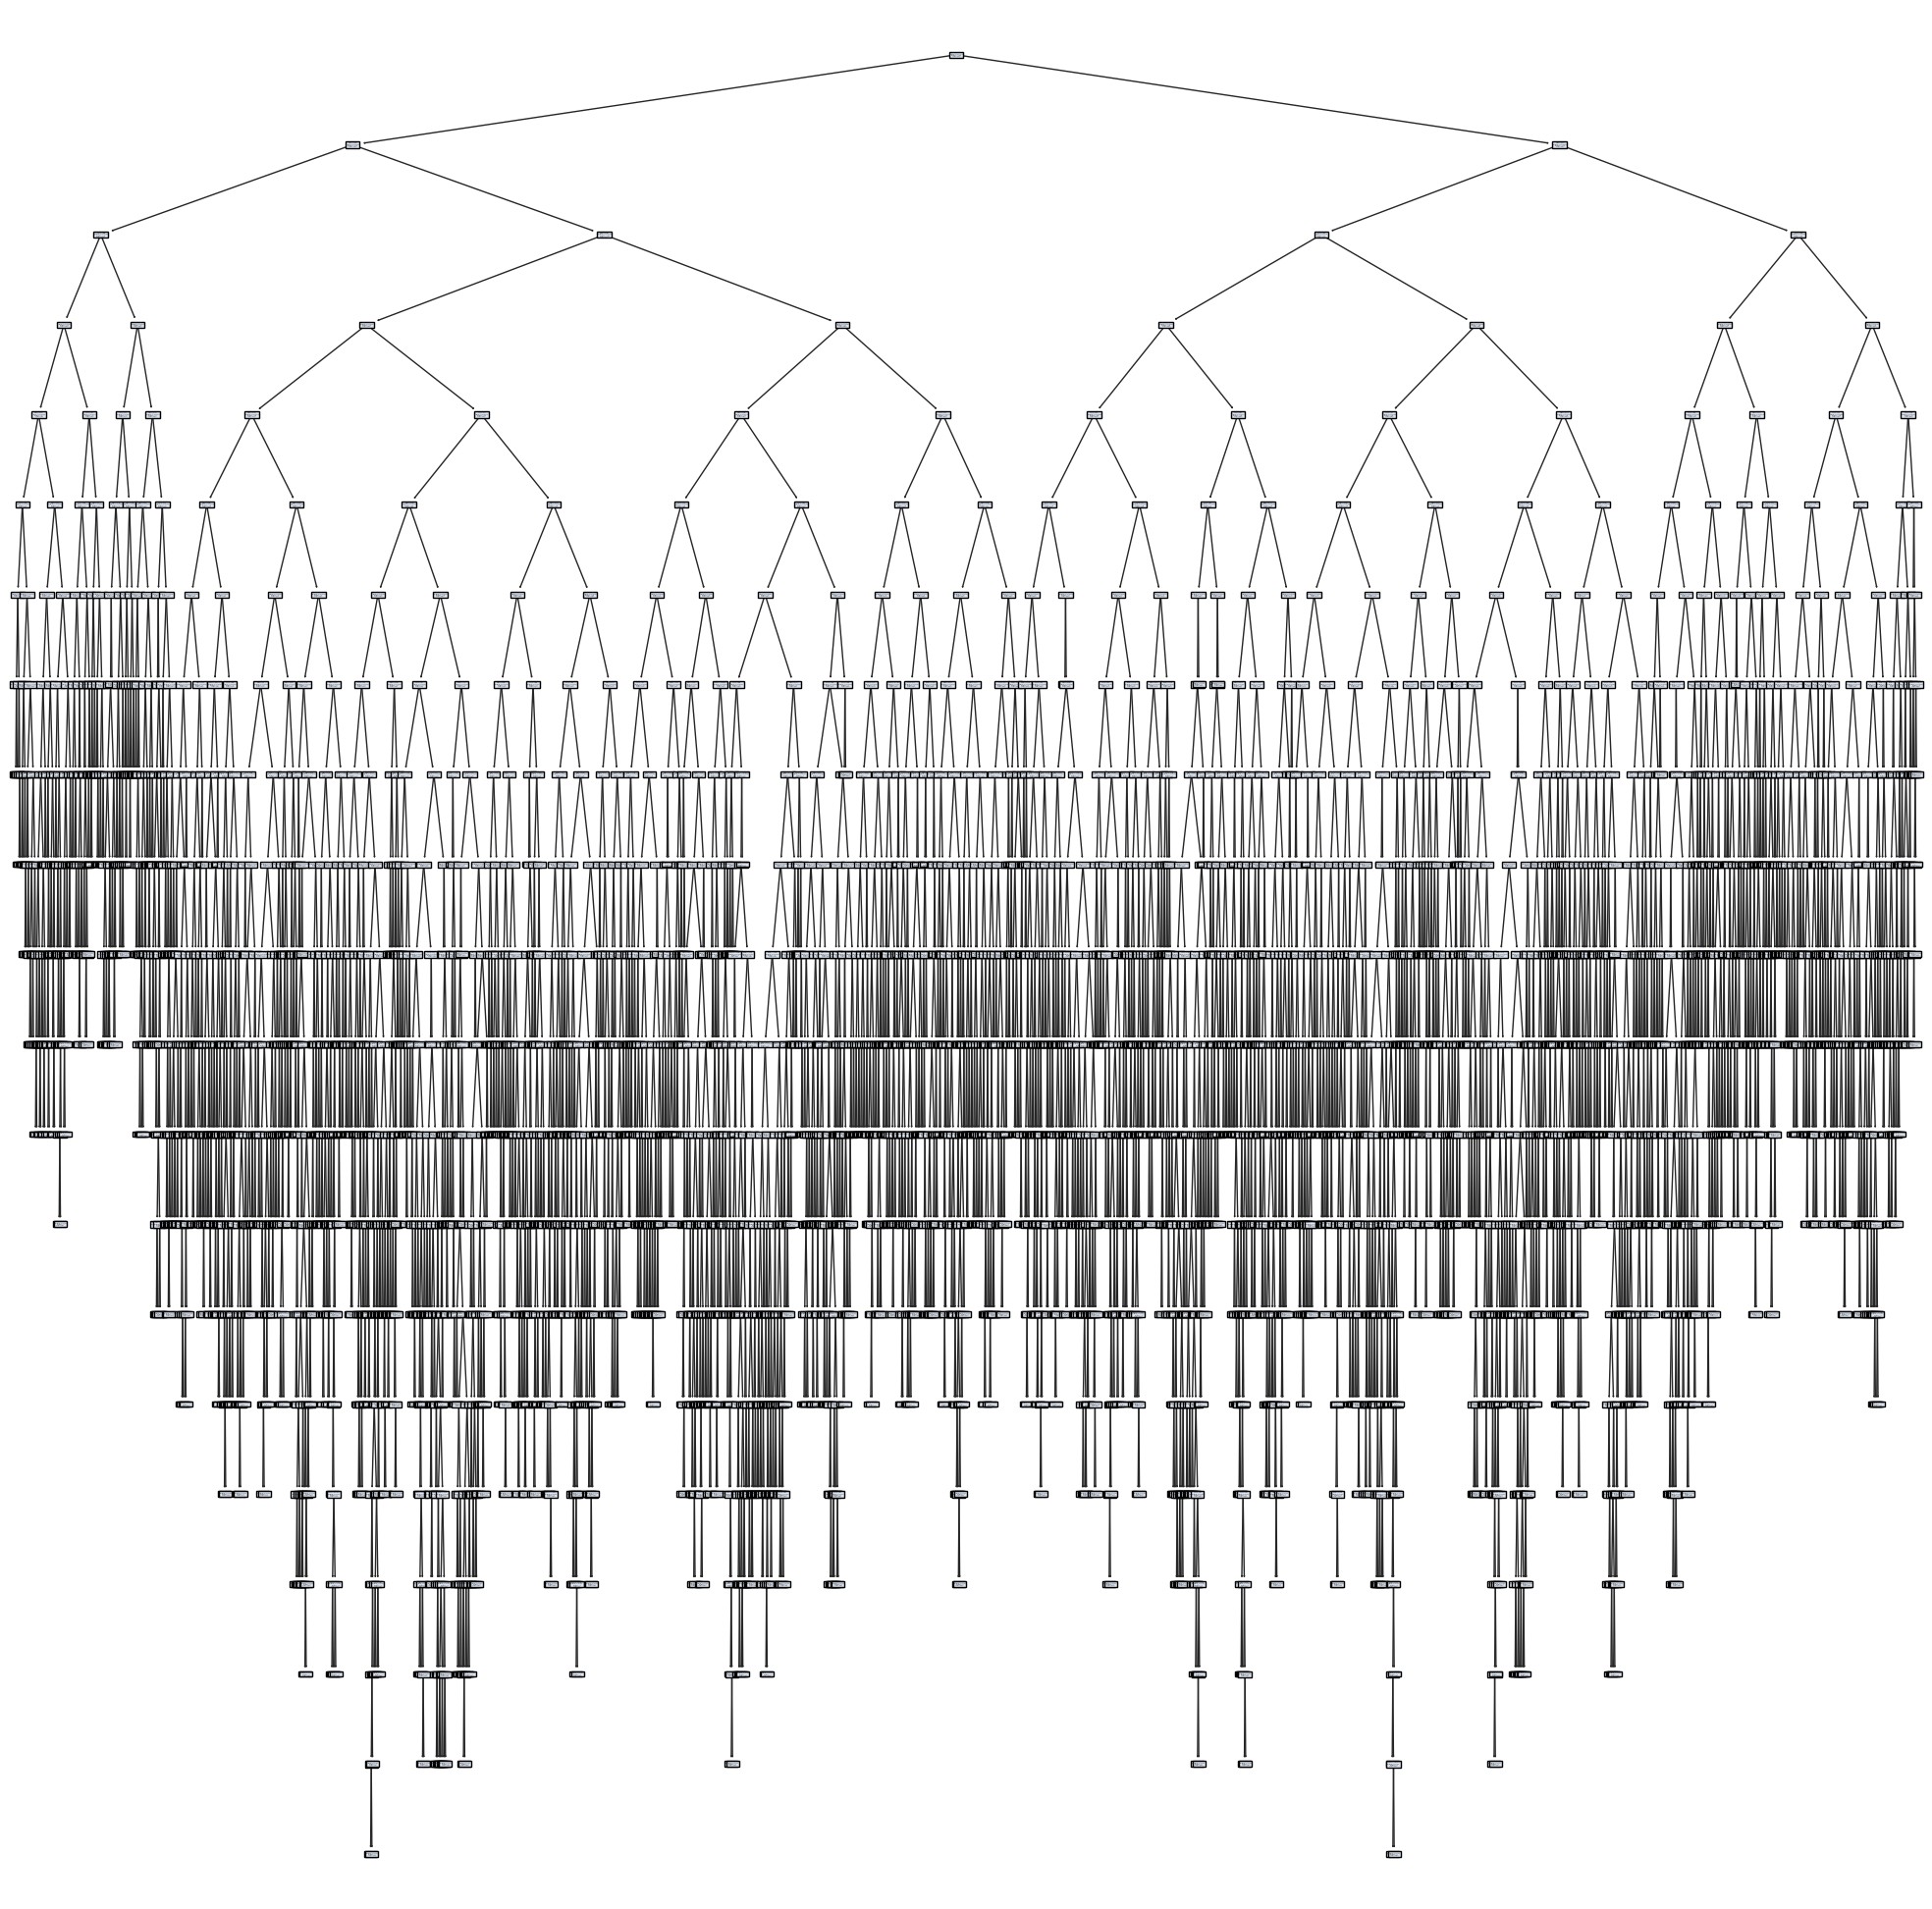

In [165]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,25))  
plot_tree(PronosticoADP, feature_names = ['Open', 'High', 'Low', 'Volume'])
plt.show()

In [182]:
# Obtener los valores de costo-complejidad para cada nodo del árbol
path = PronosticoADP.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Crear una lista de modelos para cada valor de ccp_alpha
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, Y_train)
    models.append(model)

# Evaluar el rendimiento de cada modelo en los datos de prueba
train_scores = [model.score(X_train, Y_train) for model in models]
test_scores = [model.score(X_test, Y_test) for model in models]

# Seleccionar el valor de ccp_alpha que maximiza el rendimiento en los datos de prueba
best_alpha = ccp_alphas[np.argmax(test_scores)]

# Crear un nuevo modelo utilizando el valor de ccp_alpha óptimo
best_model = DecisionTreeRegressor(random_state=0, ccp_alpha=best_alpha)
best_model.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=2.2811865554793375e-06, random_state=0)

In [184]:
Y_PronosticoBest = best_model.predict(X_test)
pd.DataFrame(Y_PronosticoBest)

,0
0,4.483222
1,5.651257
2,5.027275
3,4.585594
4,4.315007
...,...
668,8.049693
669,6.034022
670,5.352597
671,4.952528


In [188]:
ValoresBest = pd.DataFrame(Y_test, Y_PronosticoBest)
ValoresBest

,0
4.483222,4.457782
5.651257,5.627488
5.027275,4.949103
4.585594,4.550412
4.315007,4.304834
...,...
8.049693,8.009971
6.034022,5.833792
5.352597,5.393042
4.952528,4.882050


In [190]:
print('Criterio: \n', best_model.criterion)
print('Importancia variables: \n', best_model.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_PronosticoBest))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_PronosticoBest))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_PronosticoBest, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_PronosticoBest))

Criterio: 
 squared_error
Importancia variables: 
 [1.17509345e-04 9.40848570e-01 5.90005922e-02 3.33287796e-05]
MAE: 0.0328
MSE: 0.0022
RMSE: 0.0469
Score: 0.9987


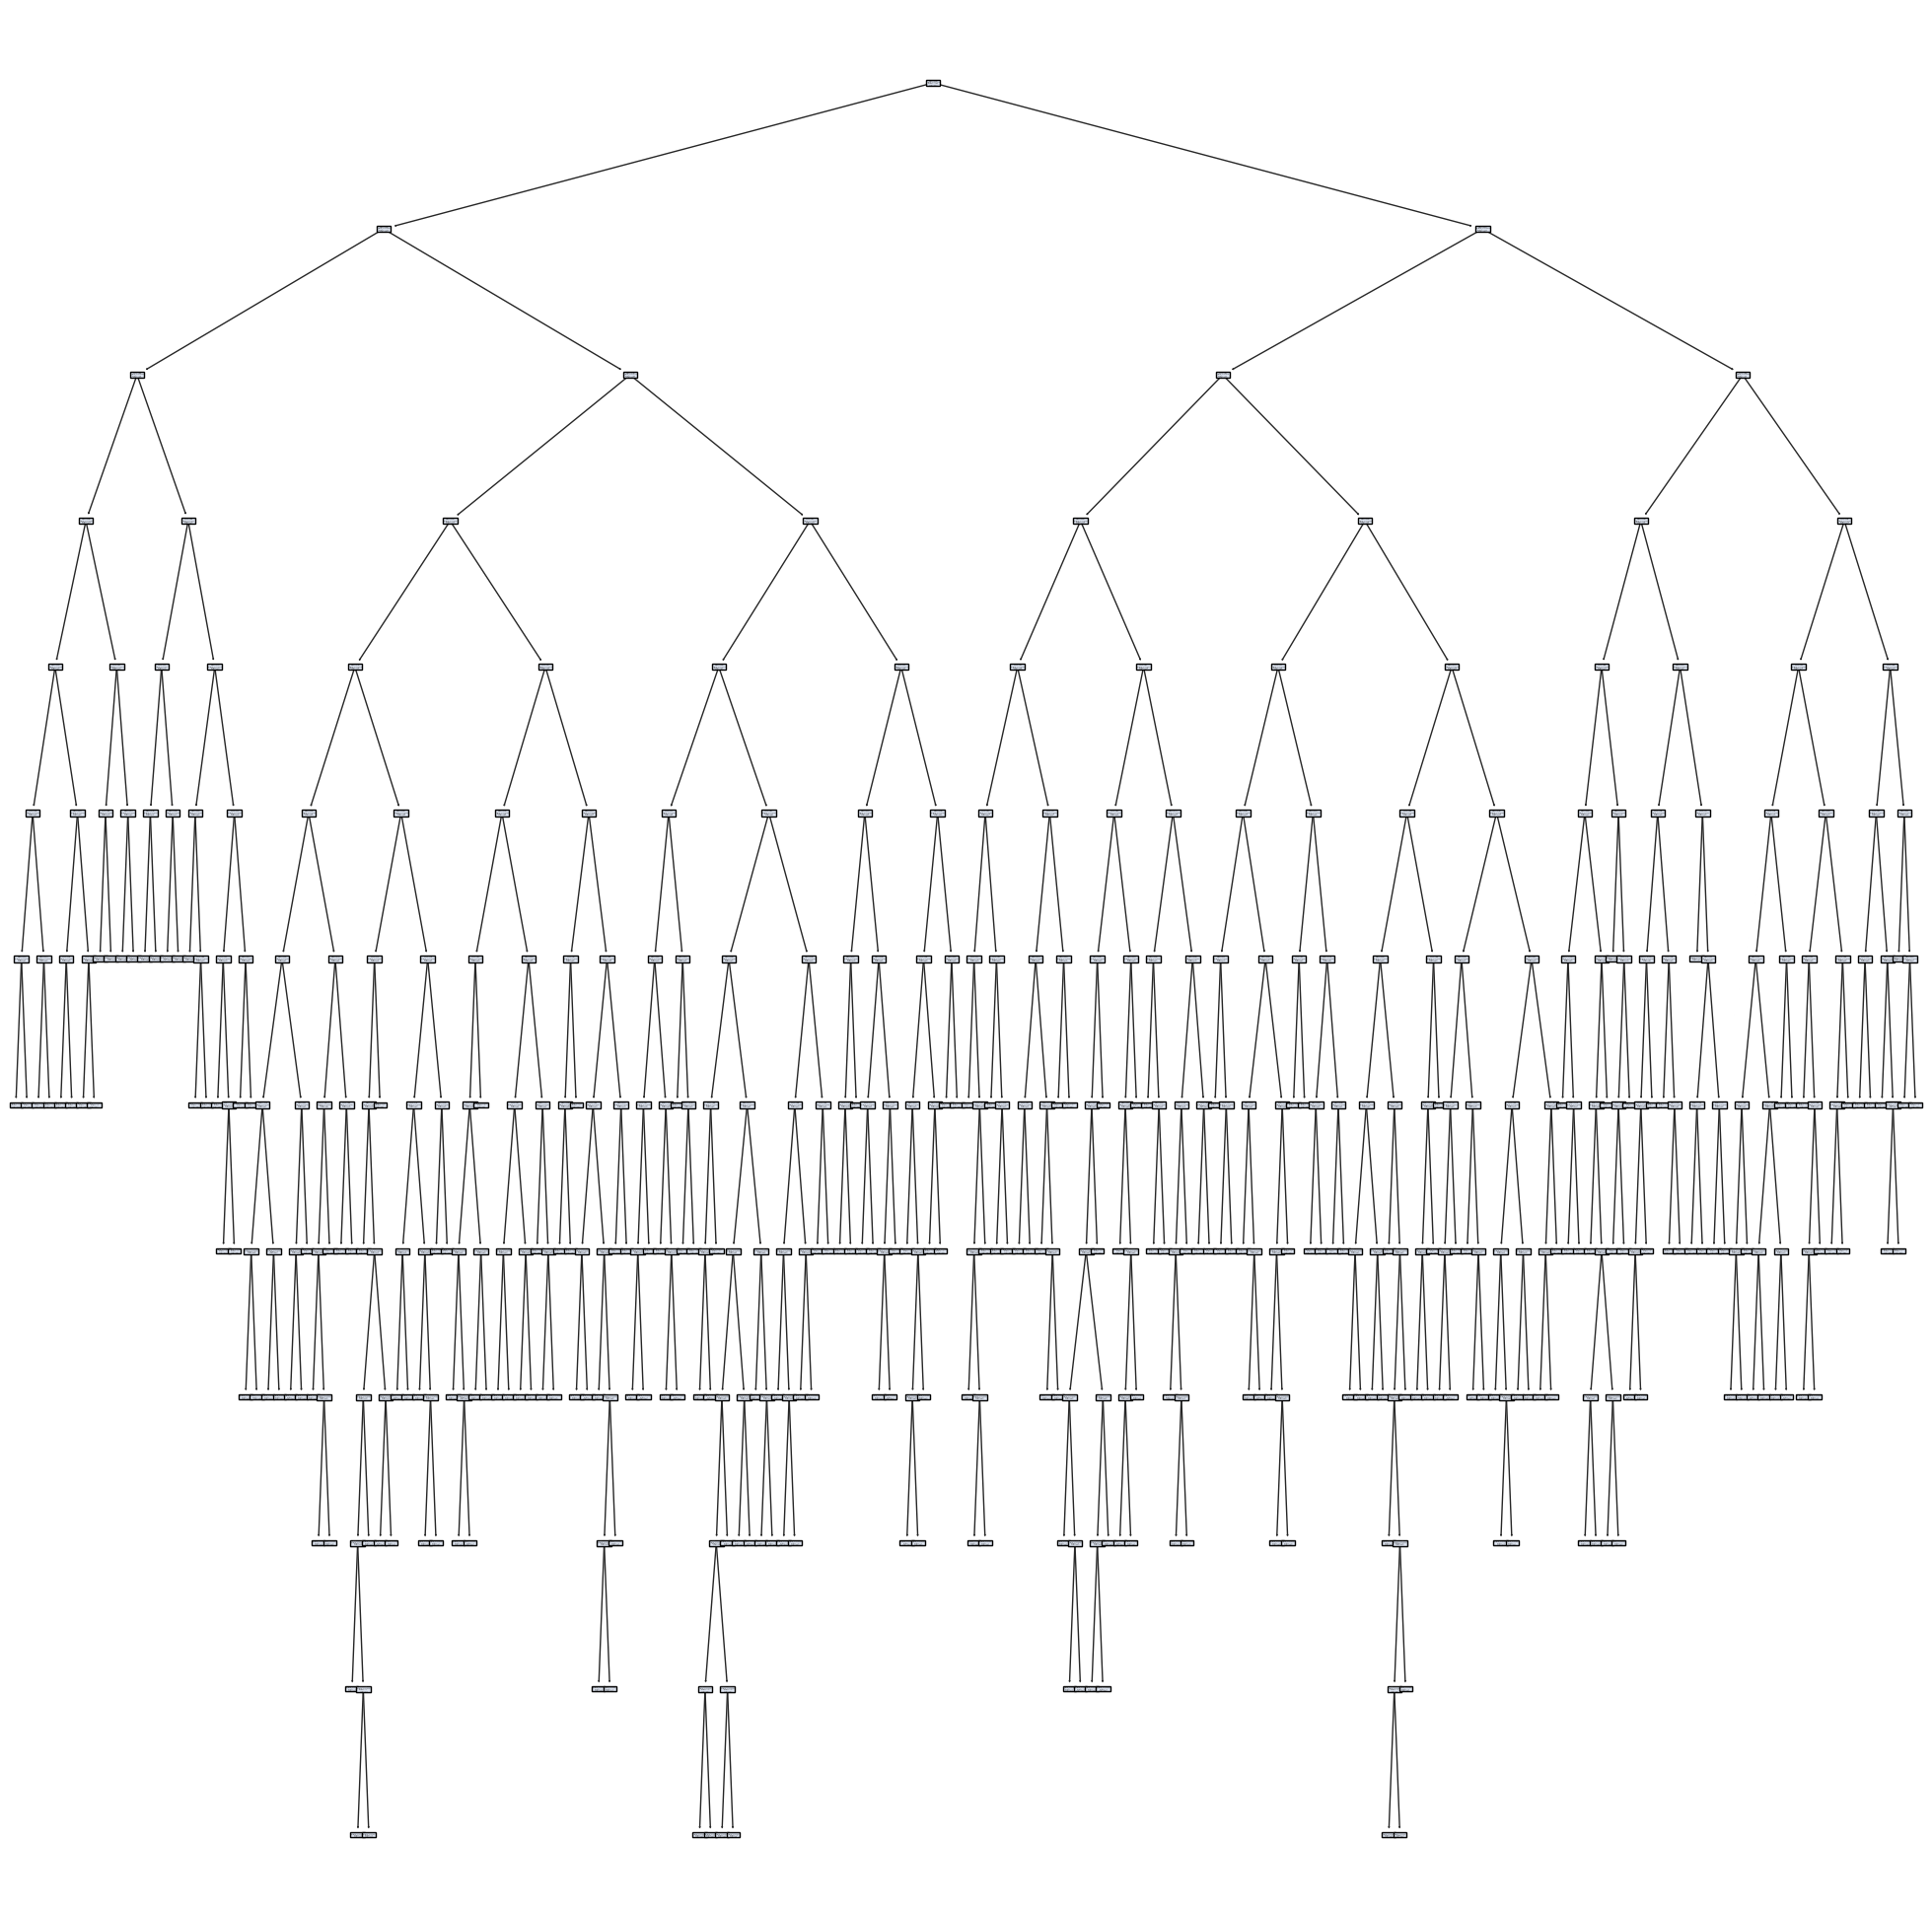

In [191]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,25))  
plot_tree(best_model, feature_names = ['Open', 'High', 'Low', 'Volume'])
plt.show()

**Bosques aleatorios**

In [166]:
from sklearn.ensemble import RandomForestRegressor

In [167]:
PronosticoBA = RandomForestRegressor(max_depth = 5, n_estimators=200, min_samples_split=8, min_samples_leaf=4, random_state=0)
PronosticoBA.fit(X_train, Y_train)

C:\Users\jorje\AppData\Local\Temp\ipykernel_25548\3450990970.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  PronosticoBA.fit(X_train, Y_train)


RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [168]:
#Se genera el pronóstico
Y_Pronostico = PronosticoBA.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,4.479971
1,5.640128
2,5.029826
3,4.588564
4,4.278223
...,...
668,8.008068
669,5.916622
670,5.436422
671,4.948281


In [169]:
Valores = pd.DataFrame(Y_test, Y_Pronostico)
Valores

,0
4.479971,4.457782
5.640128,5.627488
5.029826,4.949103
4.588564,4.550412
4.278223,4.304834
...,...
8.008068,8.009971
5.916622,5.833792
5.436422,5.393042
4.948281,4.882050


In [170]:
r2_score(Y_test, Y_Pronostico)

0.998674001683143

In [171]:
print('Criterio: \n', PronosticoBA.criterion)
print('Importancia variables: \n', PronosticoBA.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_Pronostico))

Criterio: 
 squared_error
Importancia variables: 
 [8.79005080e-04 6.82172562e-01 3.16931309e-01 1.71235056e-05]
MAE: 0.0353
MSE: 0.0023
RMSE: 0.0475
Score: 0.9987


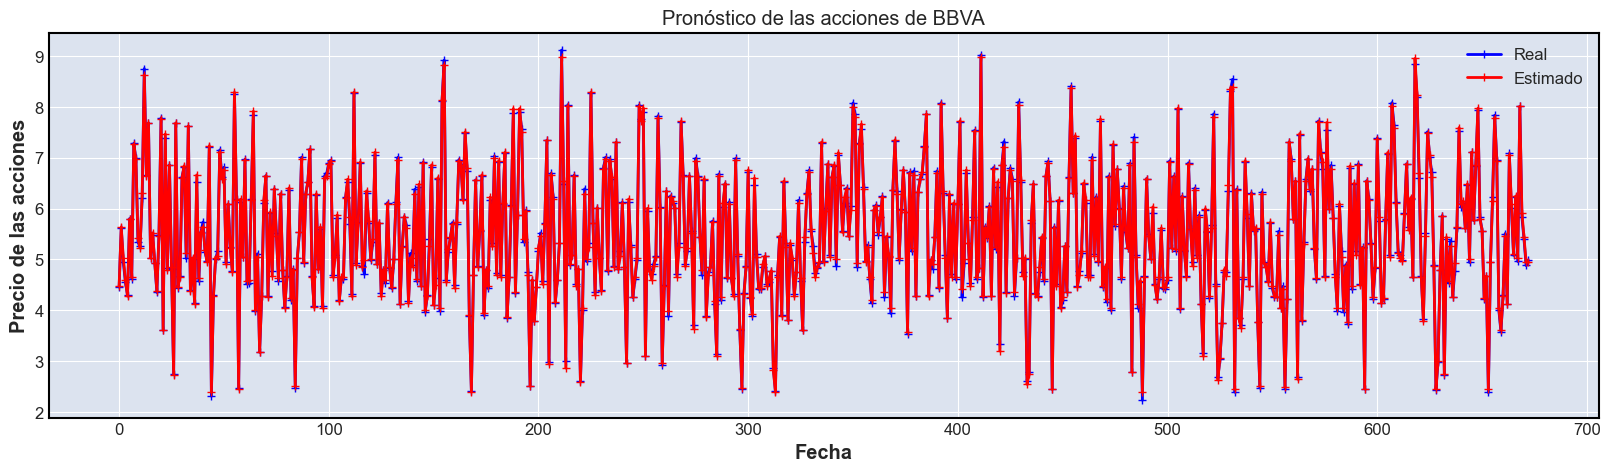

In [172]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='blue', marker='+', label='Real')
plt.plot(Y_Pronostico, color='red', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de BBVA')
plt.grid(True)
plt.legend()
plt.show()

In [173]:
Importancia = pd.DataFrame({'Variable': list(dataset[['Open', 'High', 'Low', 'Volume']]),
                            'Importancia': PronosticoBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
1,High,0.682173
2,Low,0.316931
0,Open,0.000879
3,Volume,0.000017


In [174]:
Estimador = PronosticoBA.estimators_[50]
Estimador

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=4,
                      min_samples_split=8, random_state=600956192)

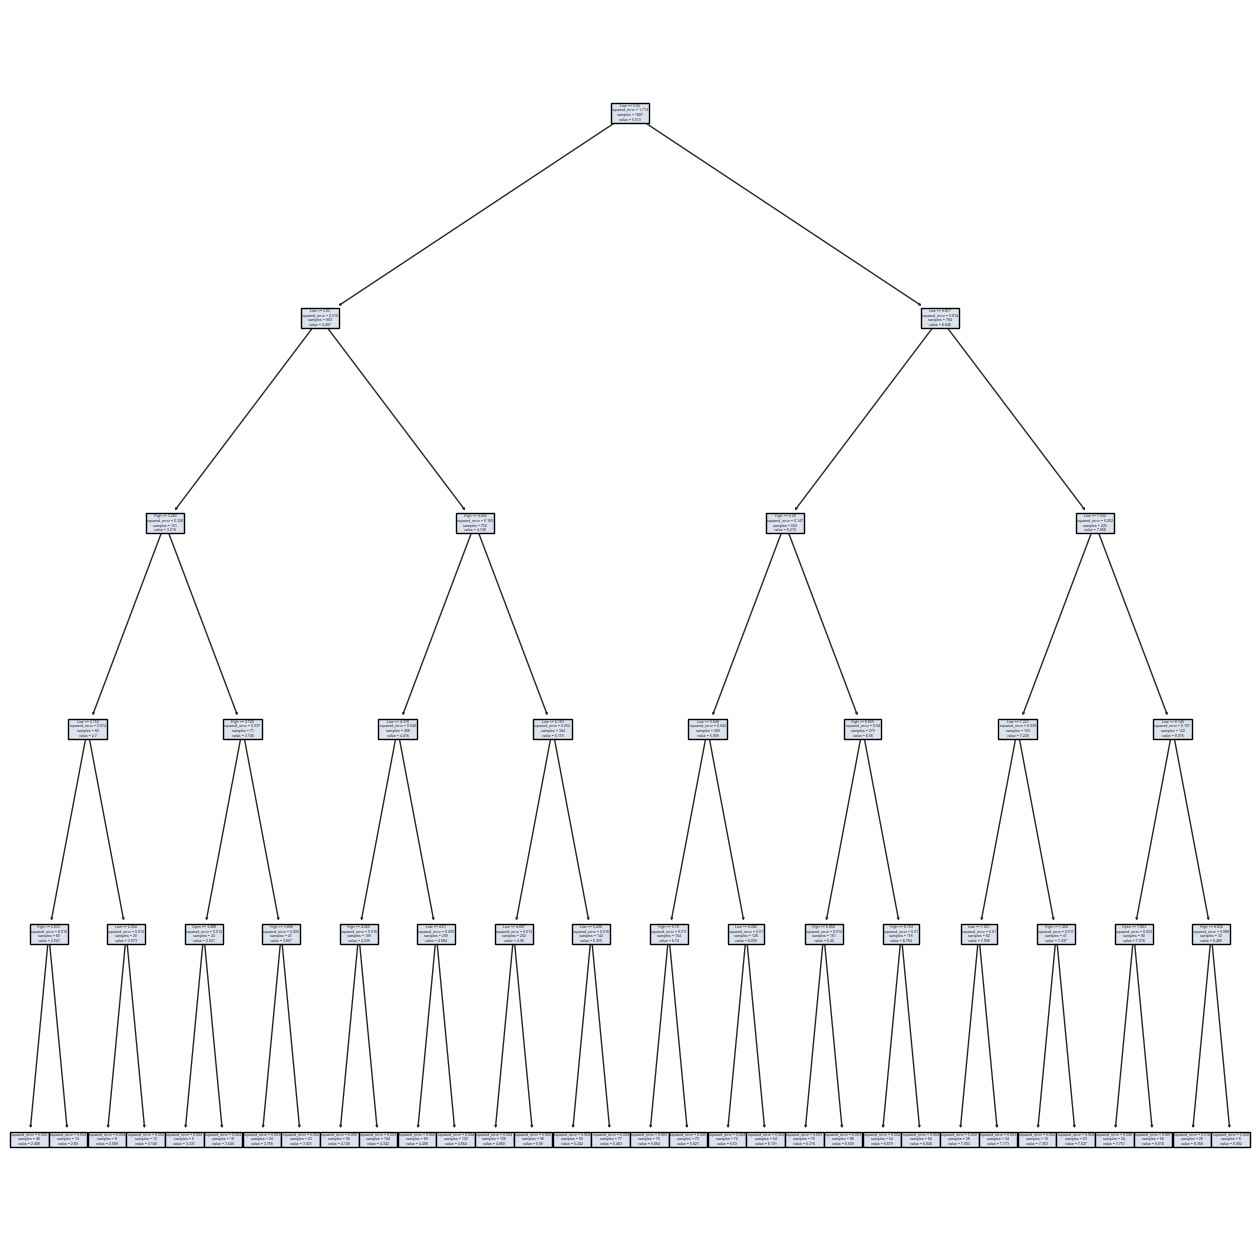

In [175]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(Estimador, 
          feature_names = ['Open', 'High', 'Low', 'Volume'])
plt.show()

In [176]:
from sklearn.tree import export_text
Reporte = export_text(Estimador, 
                      feature_names = ['Open', 'High', 'Low', 'Volume'])
print(Reporte)

|--- Low <= 5.52
|   |--- Low <= 3.93
|   |   |--- High <= 3.28
|   |   |   |--- Low <= 2.75
|   |   |   |   |--- High <= 2.63
|   |   |   |   |   |--- value: [2.47]
|   |   |   |   |--- High >  2.63
|   |   |   |   |   |--- value: [2.69]
|   |   |   |--- Low >  2.75
|   |   |   |   |--- Low <= 2.99
|   |   |   |   |   |--- value: [2.96]
|   |   |   |   |--- Low >  2.99
|   |   |   |   |   |--- value: [3.15]
|   |   |--- High >  3.28
|   |   |   |--- High <= 3.73
|   |   |   |   |--- Open <= 3.47
|   |   |   |   |   |--- value: [3.33]
|   |   |   |   |--- Open >  3.47
|   |   |   |   |   |--- value: [3.55]
|   |   |   |--- High >  3.73
|   |   |   |   |--- High <= 3.90
|   |   |   |   |   |--- value: [3.76]
|   |   |   |   |--- High >  3.90
|   |   |   |   |   |--- value: [3.92]
|   |--- Low >  3.93
|   |   |--- High <= 4.80
|   |   |   |--- Low <= 4.38
|   |   |   |   |--- High <= 4.27
|   |   |   |   |   |--- value: [4.13]
|   |   |   |   |--- High >  4.27
|   |   |   |   |   |--- va